In [1]:
import os
from PIL import Image
import cv2
from matplotlib import pyplot as plt
import numpy as np

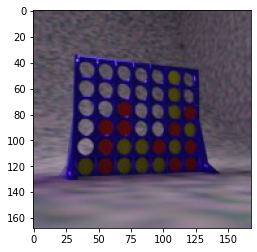

In [2]:
test_img = Image.open('labelren/0lbrn.jpeg')
coords = open('labelren/lbrn0.txt').read().replace('[', '').replace(']', '').split(',')
x1, y1, x2, y2, x3, y3, x4, y4 = [float(x) for x in coords]
top_left = [x1, y1]
top_right = [x2, y2]
bottom_right = [x3, y3]
bottom_left = [x4, y4]
plt.imshow(test_img)

(168, 168)


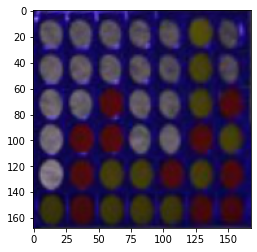

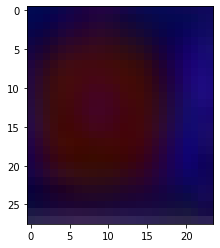

In [18]:
M = cv2.getPerspectiveTransform(np.float32([top_left, bottom_left, bottom_right, top_right]), np.float32([(0, 0), (0, 168), (168, 168), (168, 0)]))
warped = cv2.warpPerspective(np.array(test_img), M, (168, 168))
warped = Image.fromarray(warped)
print(warped.size)
plt.imshow(warped)
plt.show()

for row in range(6):
    for column in range(7):
        cropped = warped.crop((column * (168 / 7), row * (168 / 6), (column + 1) * (168 / 7), (row + 1) * (168 / 6)))
        cropped.save(str(row) + str(column) + '.jpg')
        plt.imshow(cropped)
        

In [ ]:
t = ProjectiveTransform()
src = np.asarray(
    [bottom_left, top_left, top_right, bottom_right])
dst = np.asarray([[0, 0], [0, 1], [1, 1], [1, 0]])
t.estimate(src, dst)

arr_img = np.array(test_img)[:, :, 0].reshape(168, 168)
data = np.asarray([
    [69.1216, 51.7061], [72.7985, 73.2601], [75.9628, 91.8095],
    [79.7145, 113.802], [83.239, 134.463], [86.6833, 154.654],
    [88.1241, 163.1], [97.4201, 139.948], [107.048, 115.969],
    [115.441, 95.0656], [124.448, 72.6333], [129.132, 98.6293],
    [133.294, 121.731], [139.306, 155.095], [143.784, 179.948],
    [147.458, 200.341], [149.872, 213.737], [151.862, 224.782],
])
print(data.shape, src.shape)
transformed_img = t(data)

In [ ]:
files = os.listdir('raw')

for idx, i in enumerate(files):
    image = Image.open('raw/' + i)
    image = image.resize((168, 168))
    image = image.convert('L')
    image.save('boards/' + str(idx) + '.jpg')

files1 = os.listdir('raw2')

for idx, i in enumerate(files1):
    image = Image.open('raw2/' + i)
    image = image.resize((168, 168))
    image = image.convert('L')
    image.save('boards/' + str(idx+len(files)) + '.jpg')
